In [90]:
# ignore warnings
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
from pydataset import data

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier as DT, plot_tree, export_text
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, recall_score, precision_score

import matplotlib.pyplot as plt
import seaborn as sns

import acquire


Using the titanic data, in your classification-exercises repository, create a notebook, decision_tree.ipynb where you will do the following:

In [91]:
titanic = acquire.get_titanic_data()
titanic.head(3)

,passenger_id,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,deck,embark_town,alone
0,0,0,3,male,22.0,1,0,7.2500,S,Third,NaN,Southampton,0
1,1,1,1,female,38.0,1,0,71.2833,C,First,C,Cherbourg,0
2,2,1,3,female,26.0,0,0,7.9250,S,Third,NaN,Southampton,1


In [92]:
def prep_titanic(titanic):
    titanic = titanic.drop(columns=['embarked','class', 'age','deck'])
    dummy_df = pd.get_dummies(data=titanic[['sex','embark_town']], drop_first=True, dtype=int)
    titanic = pd.concat([titanic, dummy_df], axis=1)
    # added a column for survived
    titanic['label'] = titanic.survived == 1
    return titanic

In [93]:
titanic = prep_titanic(titanic)

In [94]:
titanic.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,label
0,0,0,3,male,1,0,7.2500,Southampton,0,1,0,1,False
1,1,1,1,female,1,0,71.2833,Cherbourg,0,0,0,0,True
2,2,1,3,female,0,0,7.9250,Southampton,1,0,0,1,True
3,3,1,1,female,1,0,53.1000,Southampton,0,0,0,1,True
4,4,0,3,male,0,0,8.0500,Southampton,1,1,0,1,False


In [95]:
def split_titanic_data(df, target='survived'):
    '''
    split titanic data will split data based on 
    the values present in a cleaned version of titanic
    that is from clean_titanic
    
    '''
    train_val, test = train_test_split(df,
                                   train_size=0.8,
                                   random_state=1108,
                                   stratify=df[target])
    train, validate = train_test_split(train_val,
                                   train_size=0.7,
                                   random_state=1108,
                                   stratify=train_val[target])
    return train, validate, test

In [96]:
train, validate, test = split_titanic_data(titanic)

In [97]:
train.shape, validate.shape, test.shape

((498, 13), (214, 13), (179, 13))

In [98]:
train.loc[:,'label'] = train['label'].apply(lambda x: 'survived' if x else 'died')
validate.loc[:,'label'] = validate['label'].apply(lambda x: 'survived' if x else 'died')
test.loc[:,'label'] = test['label'].apply(lambda x: 'survived' if x else 'died')

In [99]:
train.head()

,passenger_id,survived,pclass,sex,sibsp,parch,fare,embark_town,alone,sex_male,embark_town_Queenstown,embark_town_Southampton,label
271,271,1,3,male,0,0,0.0000,Southampton,1,1,0,1,survived
786,786,1,3,female,0,0,7.4958,Southampton,1,0,0,1,survived
86,86,0,3,male,1,3,34.3750,Southampton,0,1,0,1,died
353,353,0,3,male,1,0,17.8000,Southampton,0,1,0,1,died
199,199,0,2,female,0,0,13.0000,Southampton,1,0,0,1,died


In [100]:
cat_cols, num_cols = [], []
# set up a for loop to build those lists out:
# so for every column in explore_columns:
for col in train:
    # check to see if its an object type,
    # if so toss it in categorical
    if train[col].dtype == 'O':
        cat_cols.append(col)
    # otherwise if its numeric:
    else:
        # check to see if we have more than just a few values:
        # if thats the case, toss it in categorical
        if train[col].nunique() < 10:
            cat_cols.append(col)
        # and otherwise call it continuous by elimination
        else:
            num_cols.append(col)

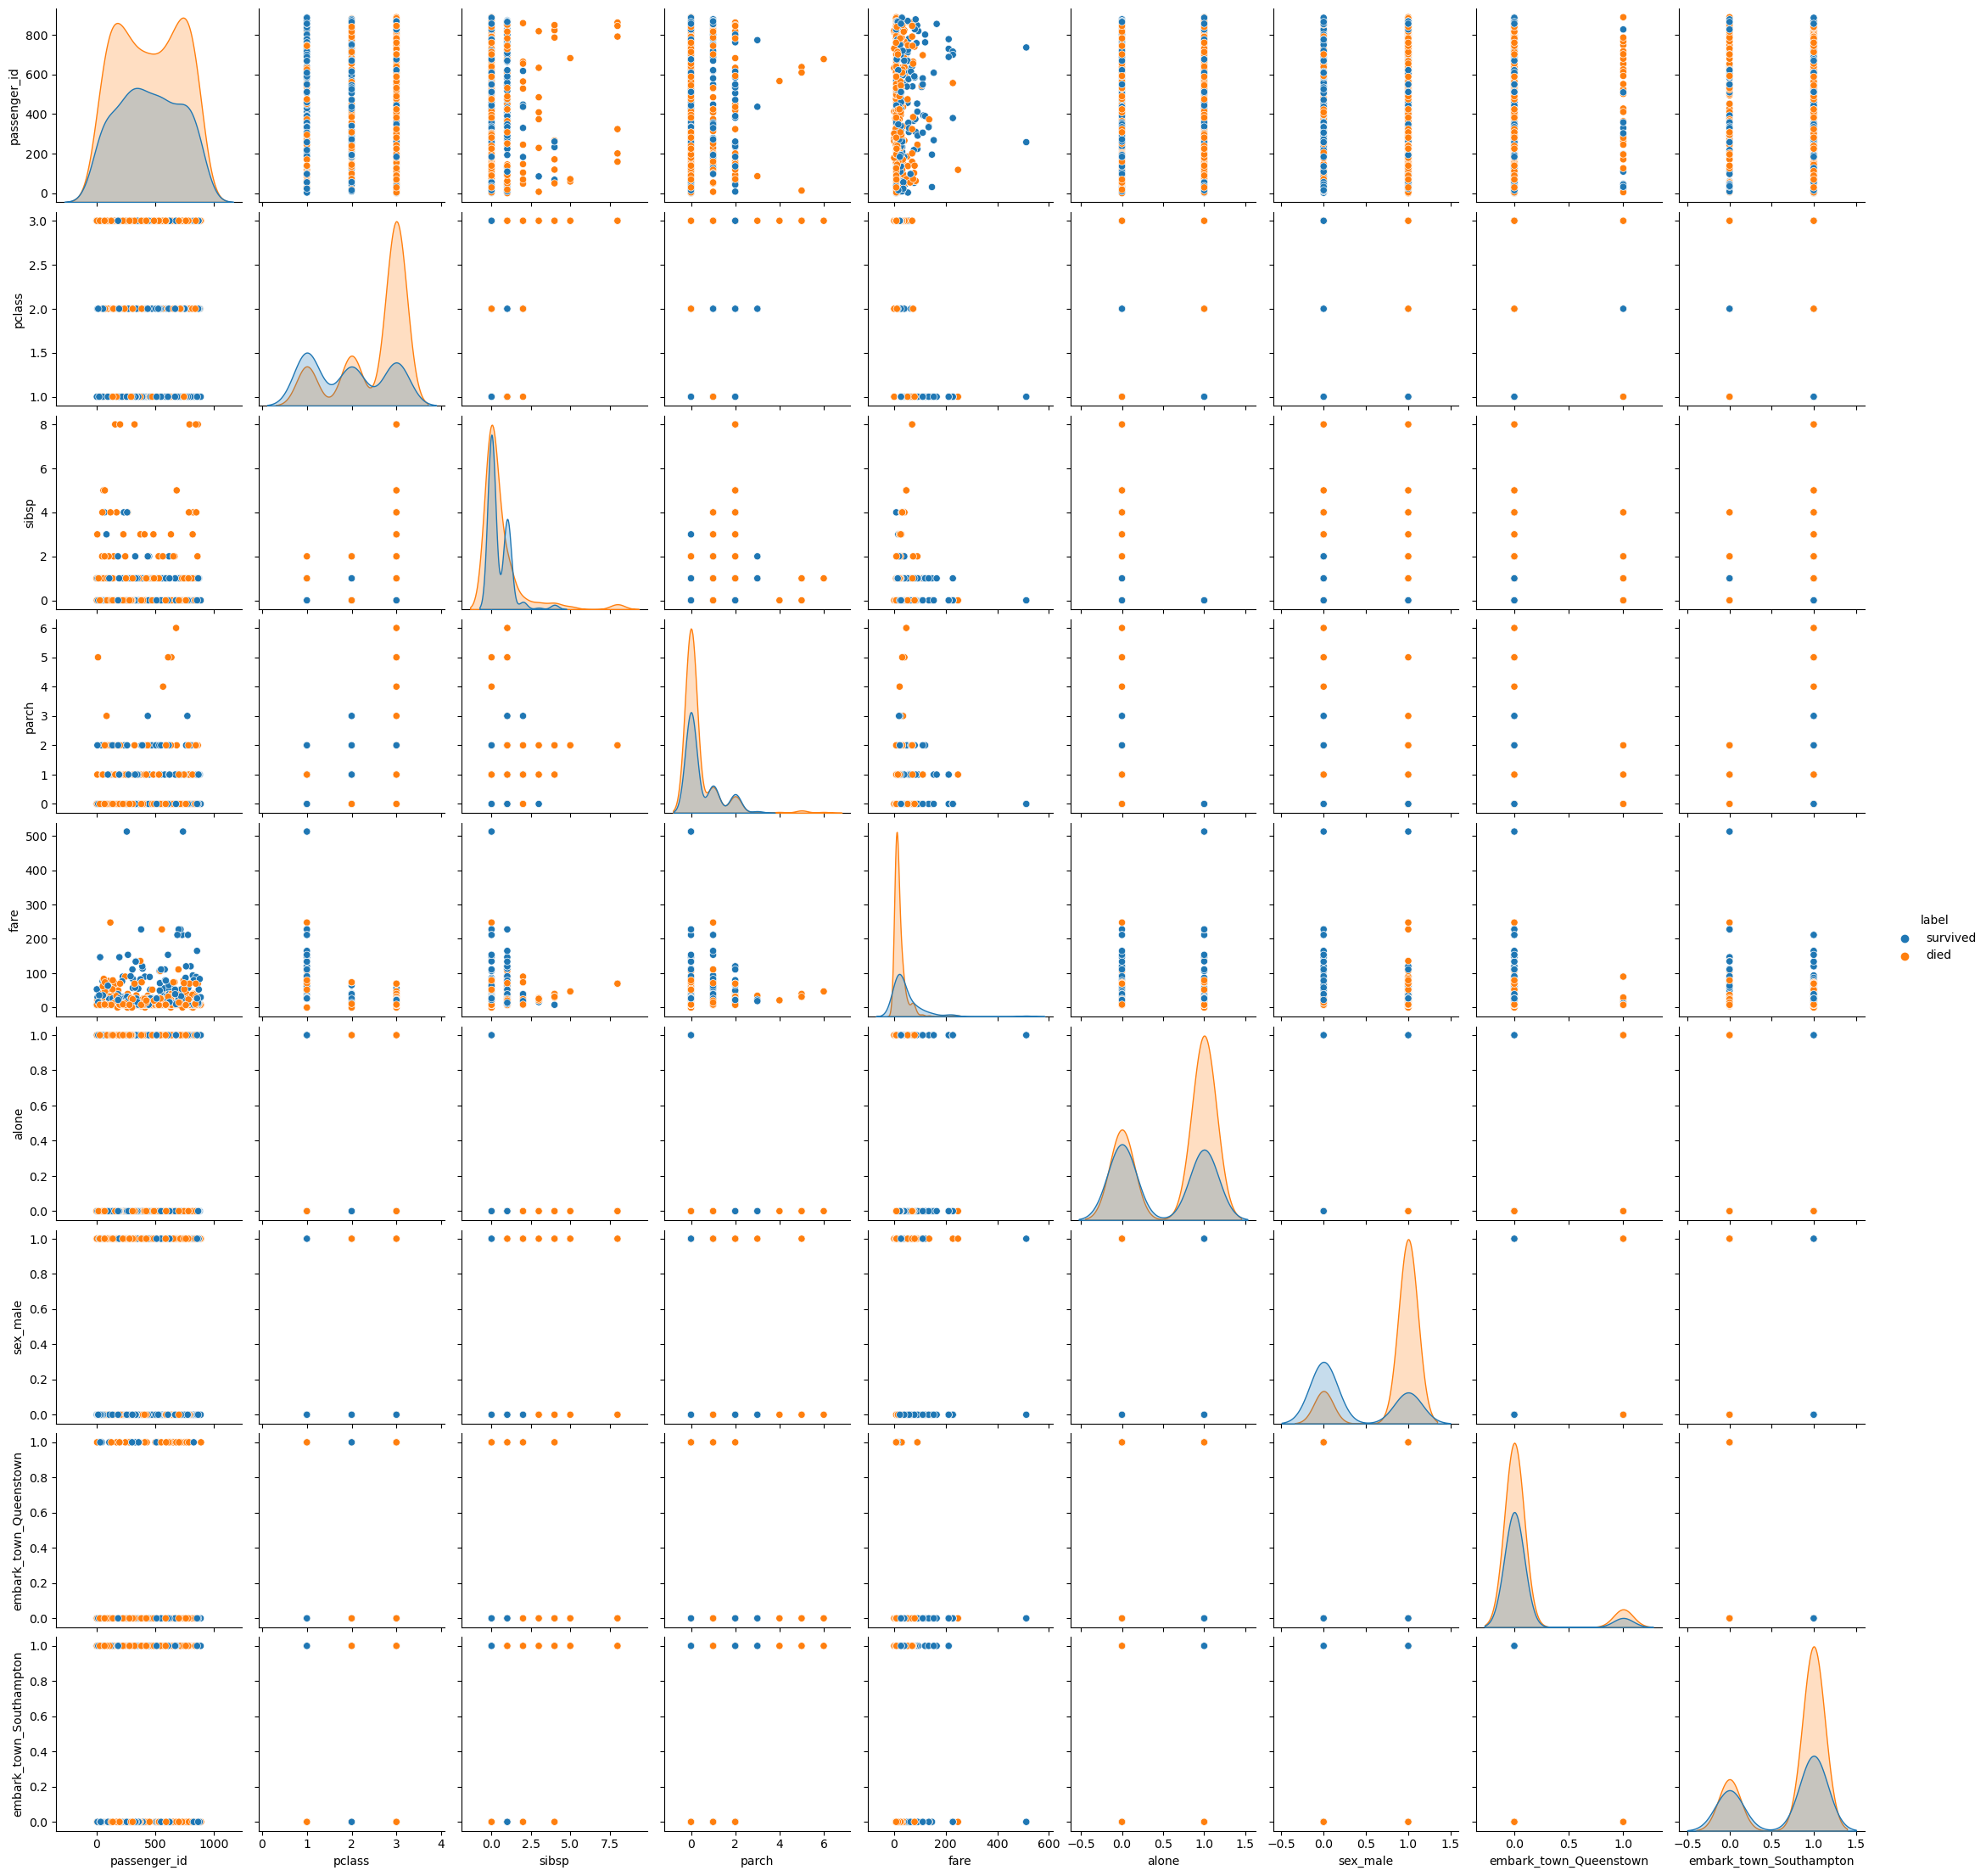

In [101]:
# basically want to determine who survived based on features
sns.pairplot(data=train.drop(columns='survived'), hue='label')

1. What is your baseline prediction? What is your baseline accuracy? remember: your baseline prediction for a classification problem is predicting the most prevelant class in the training dataset (the mode). When you make those predictions, what is your accuracy? This is your baseline accuracy.



In [102]:
train.label.value_counts()

label
died        307
survived    191
Name: count, dtype: int64

In [103]:
clf = DT(max_depth=5)

In [110]:
X_train = train.drop(columns=['survived', 'label', 'sex','embark_town'])
y_train = train[['label']]
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

2. Fit the decision tree classifier to your training sample and transform (i.e. make predictions on the training sample)



In [111]:
model1_preds = clf.predict(X_train)

In [112]:
accuracy_score(y_train, model1_preds)

0.8514056224899599

In [122]:
labels = list(y_train.label.unique())

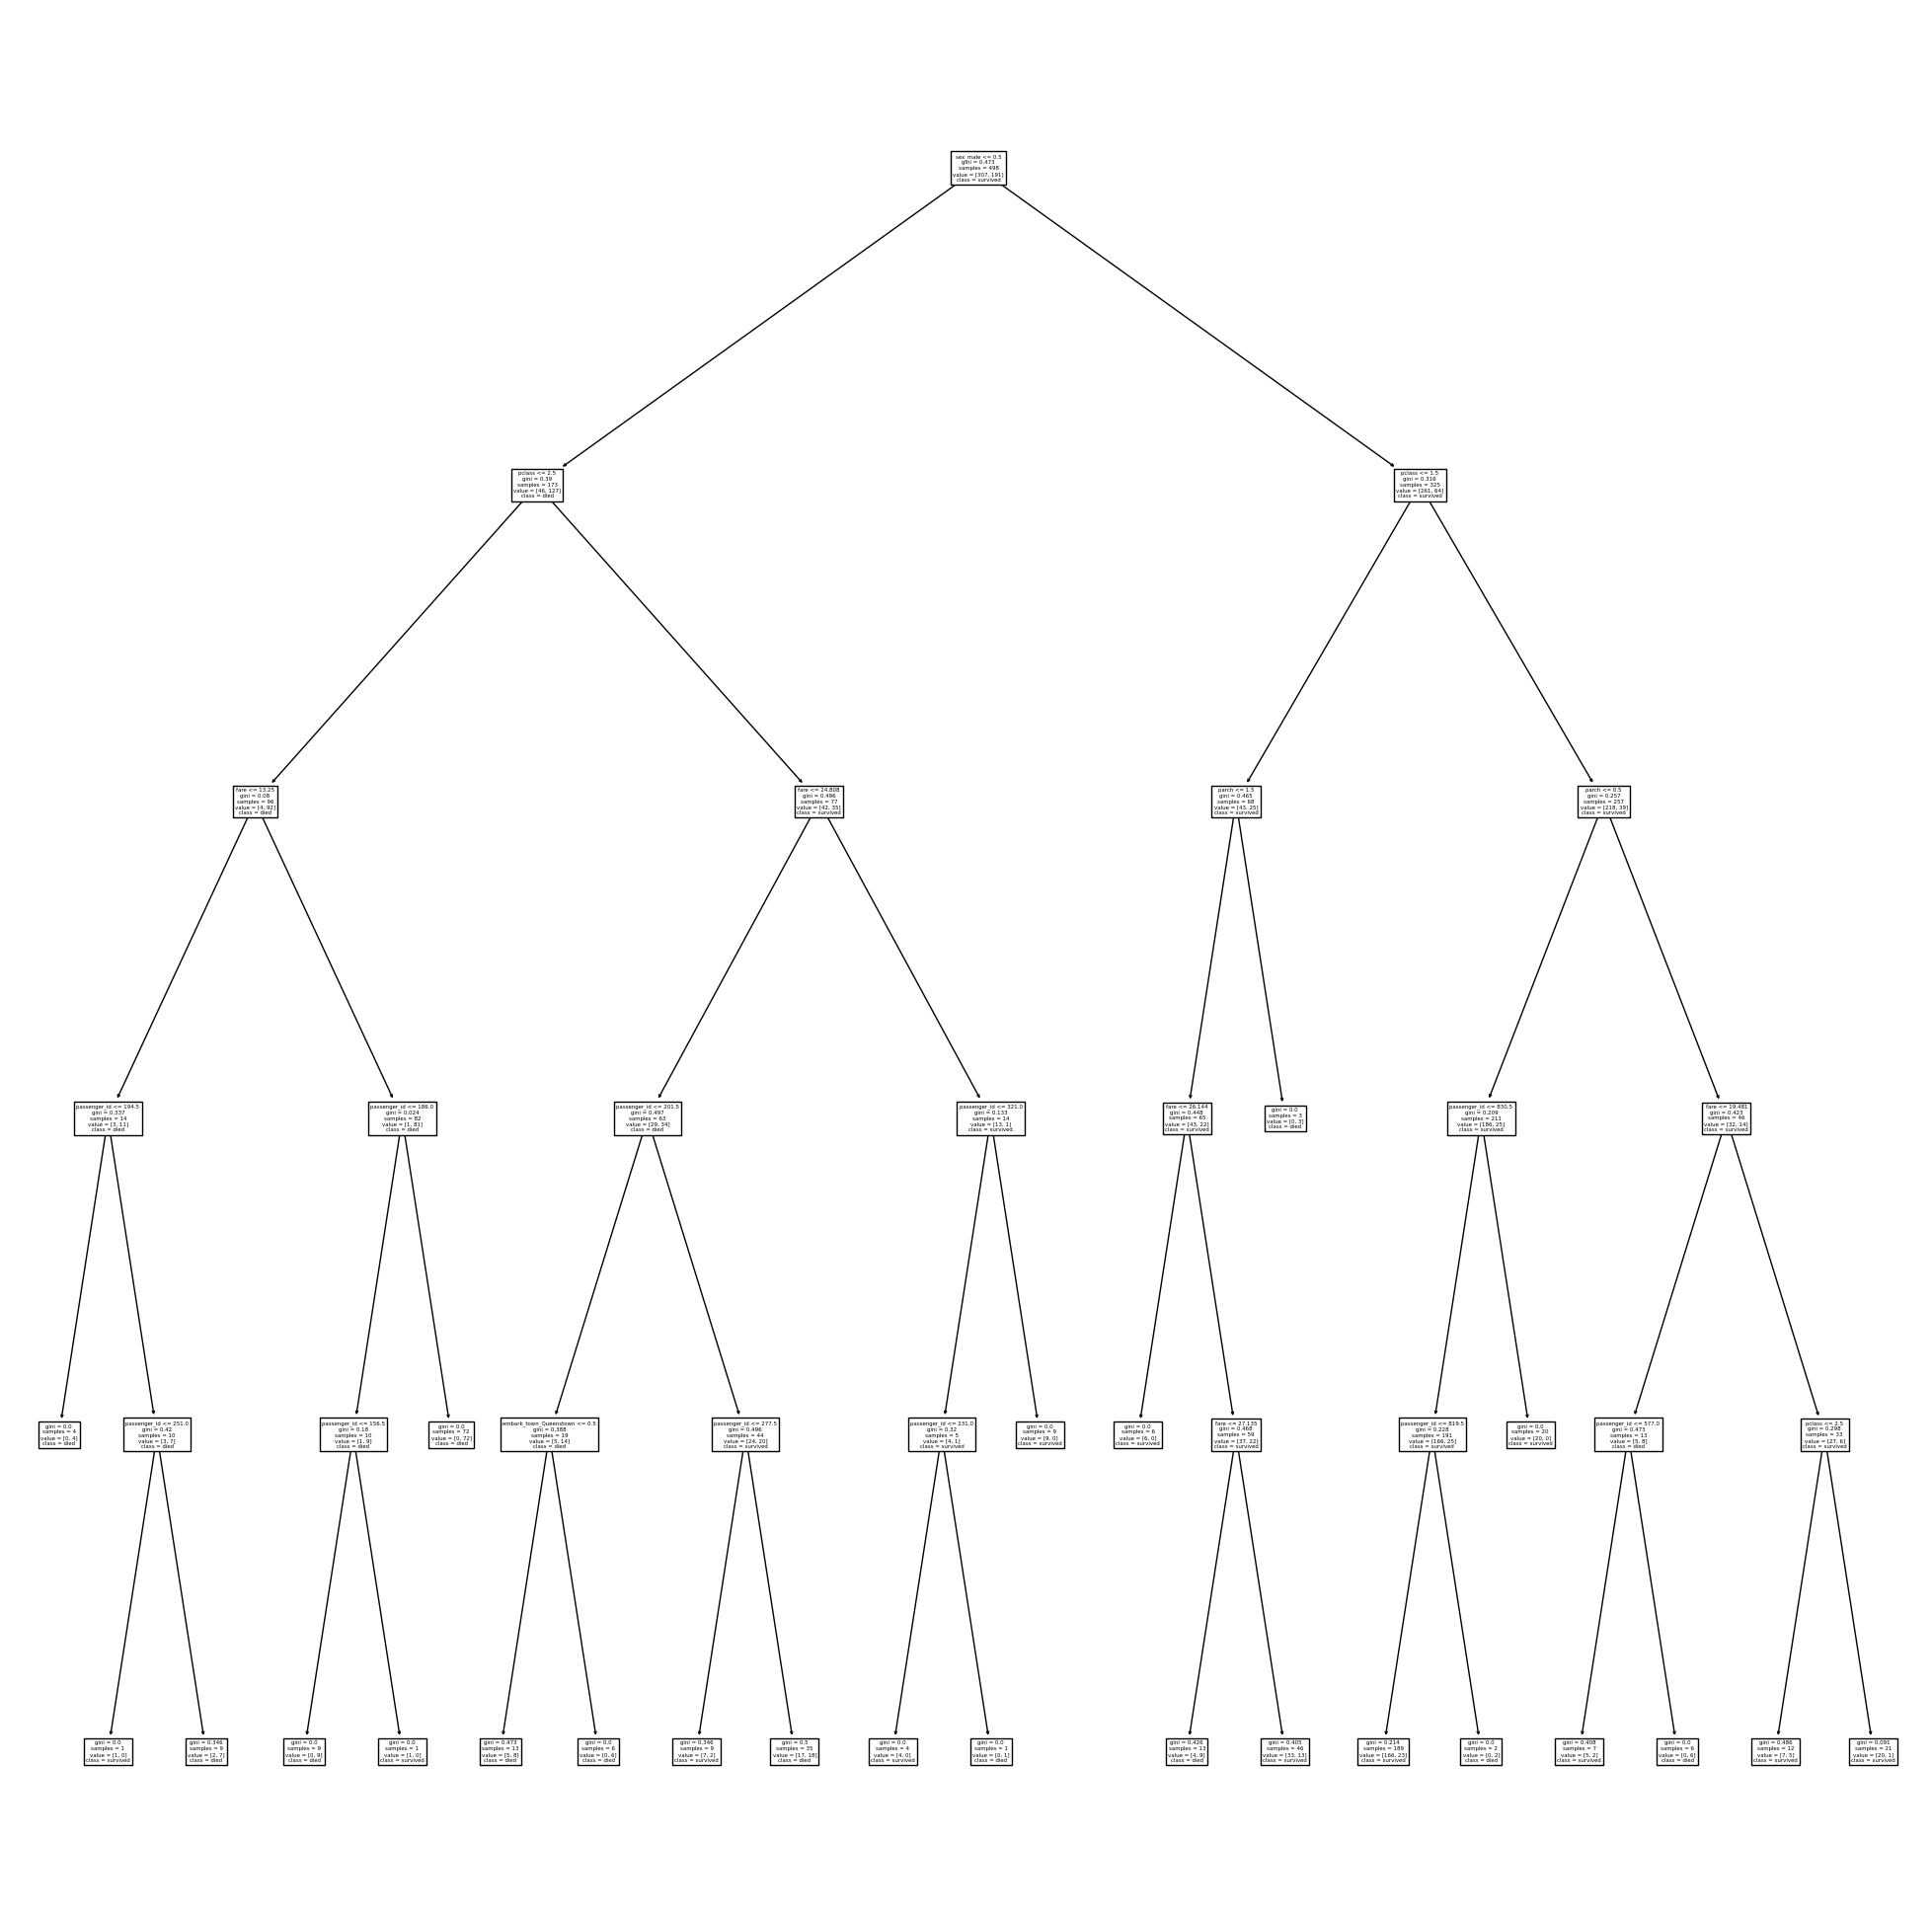

In [124]:
# plot tree:
plt.figure(figsize=(25,25))
plot_tree(clf, class_names=labels,feature_names=X_train.columns.to_list())

plt.show()

3. Evaluate your in-sample results using the model score, confusion matrix, and classification report.



In [113]:
clf.score(X_train, y_train)

0.8514056224899599

In [115]:
confusion_matrix(y_train, model1_preds)

array([[279,  28],
       [ 46, 145]])

In [117]:
pd.DataFrame(
    confusion_matrix(y_train, model1_preds),
    columns=['pred_0', 'pred_1'],
    index=['actual_0', 'actual_1'])

,pred_0,pred_1
actual_0,279,28
actual_1,46,145


4. Compute: Accuracy, true positive rate, false positive rate, true negative rate, false negative rate, precision, recall, f1-score, and support.



In [118]:
print(classification_report(y_train, model1_preds))

              precision    recall  f1-score   support

        died       0.86      0.91      0.88       307
    survived       0.84      0.76      0.80       191

    accuracy                           0.85       498
   macro avg       0.85      0.83      0.84       498
weighted avg       0.85      0.85      0.85       498



In [119]:
pd.DataFrame(
    classification_report(y_train, 
                      model1_preds,
                     output_dict=True)).T

,precision,recall,f1-score,support
died,0.858462,0.908795,0.882911,307.000000
survived,0.838150,0.759162,0.796703,191.000000
accuracy,0.851406,0.851406,0.851406,0.851406
macro avg,0.848306,0.833979,0.839807,498.000000
weighted avg,0.850671,0.851406,0.849848,498.000000


5. Run through steps 2-4 using a different max_depth value.



6. Which model performs better on your in-sample data?



7. Which model performs best on your out-of-sample data, the validate set?

